<a href="https://colab.research.google.com/github/G1A021037-ANJASFEDO/FCCMachineLearning/blob/main/Magic_Gamma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

Dataset

In [84]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [85]:
df["class"] = (df["class"] == "g").astype(int)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


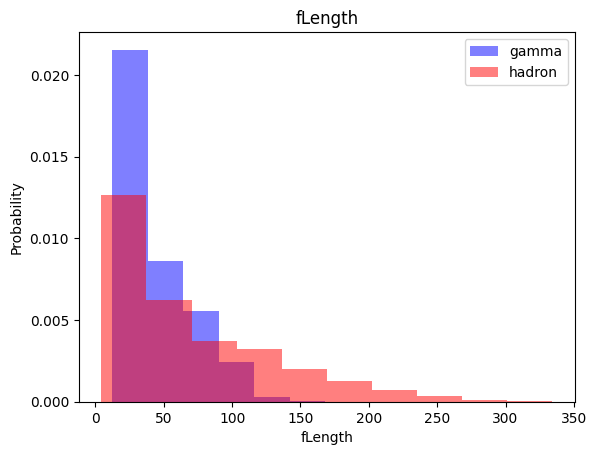

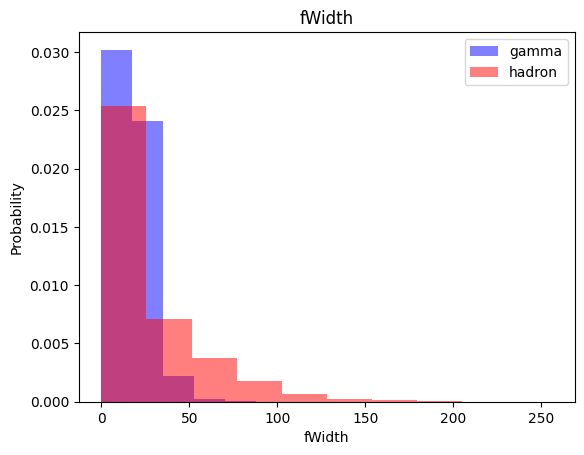

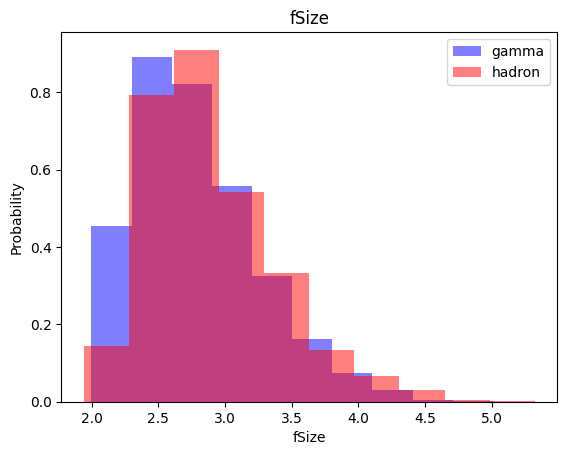

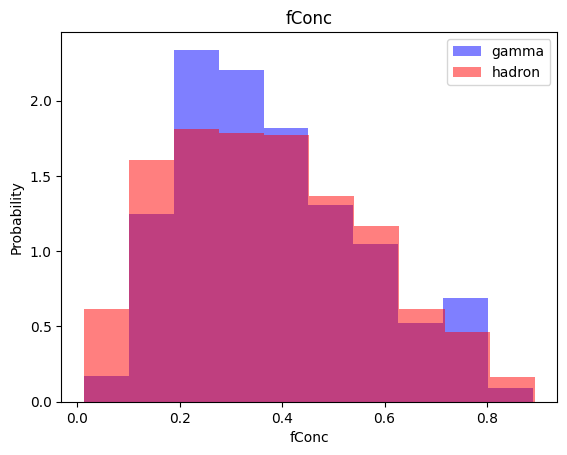

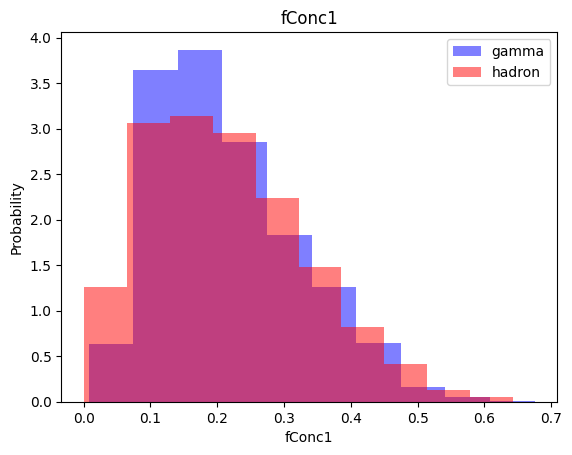

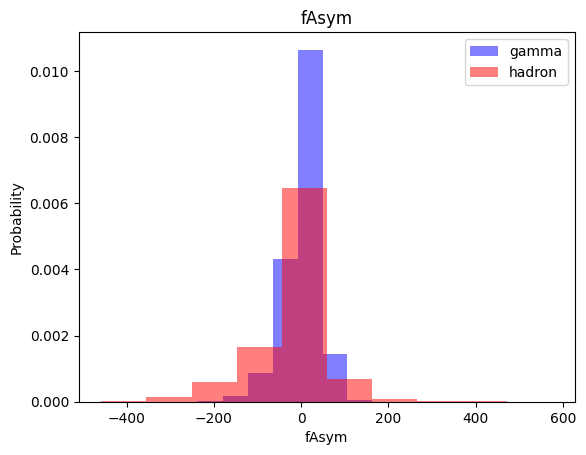

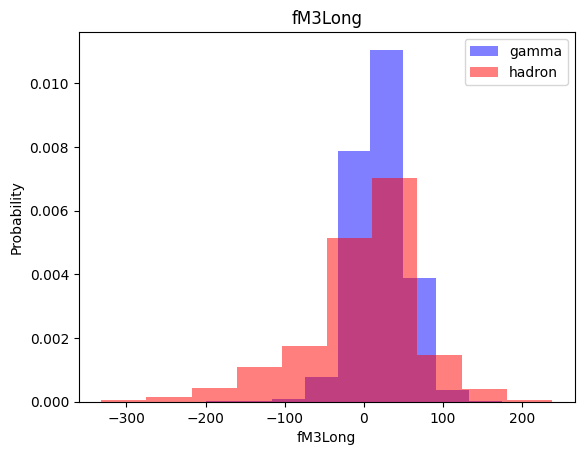

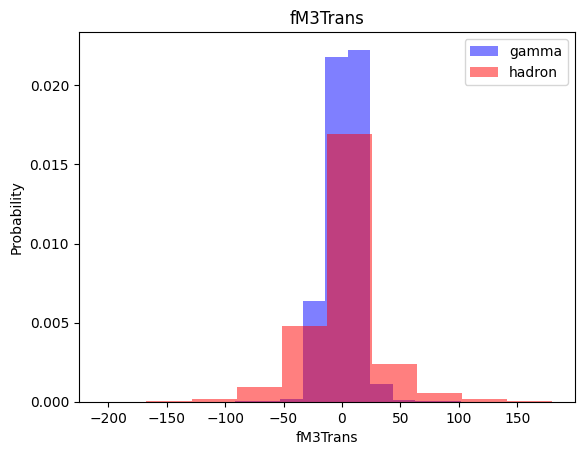

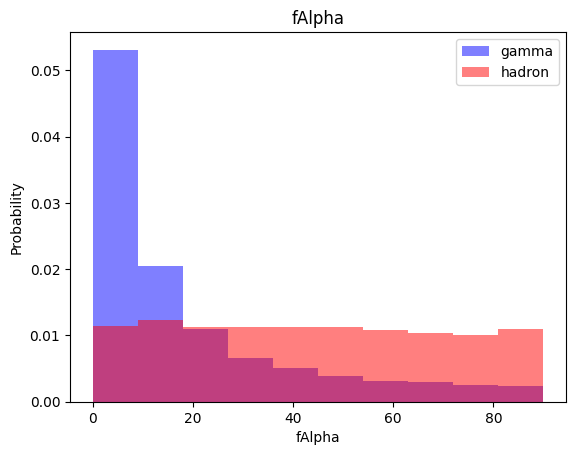

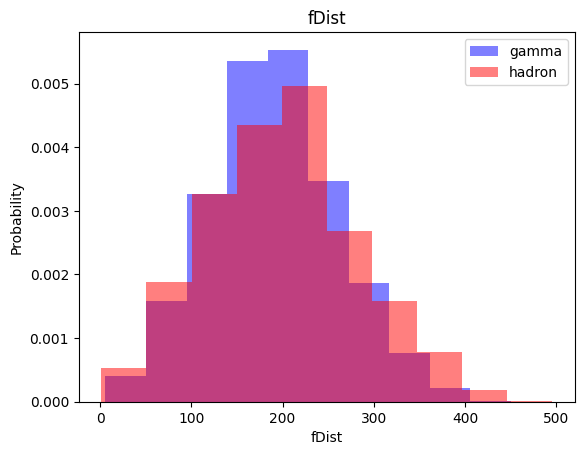

In [86]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color="blue", label="gamma", alpha=0.5, density=True)
  plt.hist(df[df["class"]==0][label], color="red", label="hadron", alpha=0.5, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

Train, Validation, and Test

In [87]:
train, valid, test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])

print(train.shape[0])
print(valid.shape[0])
print(test.shape[0])

11412
3804
3804


In [88]:
def scaleDataset(dataframe, oversample = False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [89]:
train, XTrain , yTrain = scaleDataset(train, oversample = True)
valid, XValid , yValid = scaleDataset(valid, oversample = False)
test, XTest , yTest = scaleDataset(test, oversample = False)

KNN

In [90]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [91]:
knnModel = KNeighborsClassifier(n_neighbors = 5)
knnModel.fit(XTrain, yTrain)

KNeighborsClassifier()

In [92]:
yPred = knnModel.predict(XTest)

In [93]:
print(classification_report(yTest, yPred))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73      1317
           1       0.85      0.86      0.86      2487

    accuracy                           0.81      3804
   macro avg       0.80      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



Naive Bayes

In [94]:
from sklearn.naive_bayes import GaussianNB

In [95]:
nbModel = GaussianNB()
nbModel = nbModel.fit(XTrain, yTrain)

In [96]:
yPred = nbModel.predict(XTest)

In [97]:
print(classification_report(yTest, yPred))

              precision    recall  f1-score   support

           0       0.63      0.40      0.49      1317
           1       0.73      0.87      0.80      2487

    accuracy                           0.71      3804
   macro avg       0.68      0.64      0.64      3804
weighted avg       0.70      0.71      0.69      3804



Log Regression

In [98]:
from sklearn.linear_model import LogisticRegression

In [100]:
lgModel = LogisticRegression()
lgModel = lgModel.fit(XTrain, yTrain)

In [102]:
yPred = lgModel.predict(XTest)
print(classification_report(yTest, yPred))

              precision    recall  f1-score   support

           0       0.68      0.73      0.70      1317
           1       0.85      0.82      0.83      2487

    accuracy                           0.79      3804
   macro avg       0.76      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



SVM

In [105]:
from sklearn.svm import SVC

In [107]:
svmModel = SVC()
svmModel = svmModel.fit(XTrain, yTrain)

In [108]:
yPred = svmModel.predict(XTest)
print(classification_report(yTest, yPred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1317
           1       0.90      0.90      0.90      2487

    accuracy                           0.87      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.87      0.87      0.87      3804

